In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('maize_yield_dataset.csv')

In [4]:
df.head()

,Date,Region,Rainfall (mm),Temperature (°C),Soil Type,Soil pH,Soil Nutrients (N-P-K),Latitude,Longitude,Altitude (m),...,Pest & Disease Prevalence (%),Previous Year Yield (kg/ha),Maize Seed Variety,Market Price (KES/kg),Planting Density (plants/m²),Harvesting Date,Crop Health,Topography,Satellite Imagery,Price of Fertilizer (KES/kg)
0,2023-04-01,Kisumu,100,24.0,Clay,7.1,13-25-19,-3.7161,38.8936,2033,...,5,433,Hybrid-1,22.6,8,2023-07-15,Average,Wet,Flooded,155
1,2023-04-01,Nakuru,128,22.7,Sandy,5.7,38-50-16,0.8628,34.0661,1413,...,4,451,Hybrid-1,19.5,4,2023-07-15,Good,Flat,Normal,146
2,2023-04-01,Nairobi,38,23.8,Sandy,5.8,23-43-44,-0.1188,35.4335,1458,...,1,235,Hybrid-1,24.7,7,2023-07-15,Average,Flat,Normal,126
3,2023-04-01,Nairobi,144,21.0,Sandy,5.8,41-43-26,-1.8951,38.2712,2763,...,11,395,Local-1,18.8,7,2023-07-15,Average,Hilly,Normal,126
4,2023-04-01,Nakuru,140,22.6,Clay,6.3,42-11-38,2.9341,38.9073,2224,...,12,213,Hybrid-2,23.0,7,2023-07-15,Good,Flat,Flooded,156


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Soil Type']=label_encoder.fit_transform(df['Soil Type'])


In [10]:
x=df[['Region','Rainfall (mm)','Temperature (°C)','Soil Type','Soil pH','Pest & Disease Prevalence (%)']]

In [11]:
x.head()

,Region,Rainfall (mm),Temperature (°C),Soil Type,Soil pH,Pest & Disease Prevalence (%)
0,1,100,24.0,0,7.1,5
1,4,128,22.7,2,5.7,4
2,3,38,23.8,2,5.8,1
3,3,144,21.0,2,5.8,11
4,4,140,22.6,0,6.3,12


In [12]:
y=df['Previous Year Yield (kg/ha)']

In [13]:
y.head()

0    433
1    451
2    235
3    395
4    213
Name: Previous Year Yield (kg/ha), dtype: int64

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)

In [17]:
print(y_pred)

[347.34378221 355.12854225 352.35944157 348.41635491 355.9494427
 349.53582153 349.87388074 351.71200627 351.43906572 349.74187366
 349.29689977 355.87282776 352.52864566 351.03804994 346.93472999
 357.08976056 349.01397489 352.70581283 350.8308734  353.61858584
 356.64690475 350.77787197 352.89423811 349.16730884 348.90430639
 355.43049467 353.09734144 354.02240608 348.15557285 351.21674813
 351.01002403 348.70498274 347.21566723 350.76853267 351.319672
 349.73092715 347.64982326 353.54428961 351.41332764 349.76693843
 351.68928864 353.2917246  352.55149431 352.50976803 349.72057605
 349.72925071 352.37042408 354.94231305 348.82343191 347.00318628
 352.55067233 350.35047638 354.41826553 348.96258519 355.40529457
 348.16838146 349.64917951 350.73728219 354.67950731 347.9378455
 351.7673735  351.90716331 349.57057519 347.03140412 351.87642348
 354.57899193 349.06001196 352.35322762 348.53660525 350.64735848
 346.82498382 353.68364974 353.86907211 352.22509622 352.69136224
 354.83259063 

In [18]:
r2=r2_score(y_test,y_pred)
print(r2)

-0.0033413964085684533


In [19]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

7370.36330593666


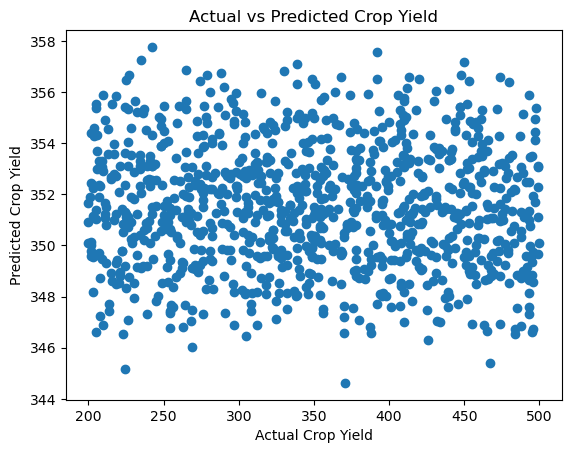

In [20]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.show()

In [21]:
correlation_coefficient = np.corrcoef(y_pred, y_test)[0, 1]

print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.03385837203955438


In [25]:
import pickle

In [26]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)